In [8]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [9]:
# Load the dataset from CSV
file_path = "/Users/yeshwanthsatyadev/Downloads/book (1).csv"  
df = pd.read_csv(file_path)

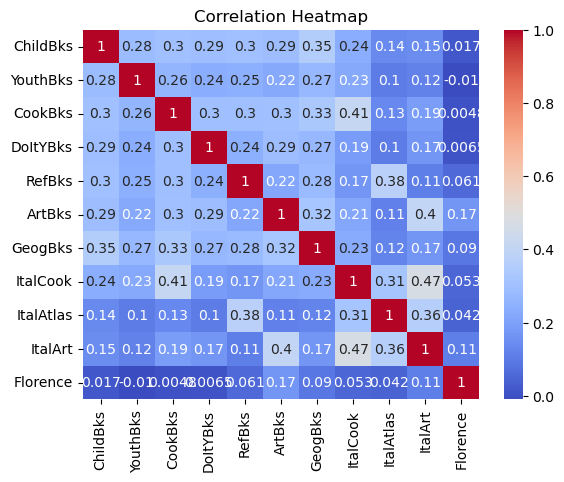

In [10]:
# EDA
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
# Encode the dataset (Assuming it's in the format where each column represents an item)
df_encoded = df.applymap(lambda x: 1 if x == 1 else 0)

In [12]:
# Experiment with different values of support and confidence
support_values = [0.1, 0.2, 0.3, 0.4]
confidence_values = [0.2, 0.3, 0.4, 0.5]

In [13]:
# Initialize lists to store results for visualization
support_conf_data = []
num_rules_data = []

In [14]:
# Generate association rules for different support and confidence values
for min_support in support_values:
    for min_confidence in confidence_values:
        frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

        # Display results
        print(f"Support: {min_support}, Confidence: {min_confidence}")
        print(f"Number of rules: {len(rules)}")
        print(rules)

        # Store data for visualization
        support_conf_data.append((min_support, min_confidence))
        num_rules_data.append(len(rules))

Support: 0.1, Confidence: 0.2
Number of rules: 100
           antecedents         consequents  antecedent support  \
0           (YouthBks)          (ChildBks)              0.2475   
1           (ChildBks)          (YouthBks)              0.4230   
2           (ChildBks)           (CookBks)              0.4230   
3            (CookBks)          (ChildBks)              0.4310   
4           (ChildBks)          (DoItYBks)              0.4230   
..                 ...                 ...                 ...   
95  (GeogBks, CookBks)            (ArtBks)              0.1925   
96   (ArtBks, CookBks)           (GeogBks)              0.1670   
97           (GeogBks)   (ArtBks, CookBks)              0.2760   
98            (ArtBks)  (GeogBks, CookBks)              0.2410   
99           (CookBks)   (GeogBks, ArtBks)              0.4310   

    consequent support  support  confidence      lift  leverage  conviction  \
0               0.4230   0.1650    0.666667  1.576044  0.060308    1.731000  

/Users/yeshwanthsatyadev/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Users/yeshwanthsatyadev/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Users/yeshwanthsatyadev/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Users/yeshwanthsatyadev/anaconda3/lib/python3.11/site-packages/mlxtend/freq

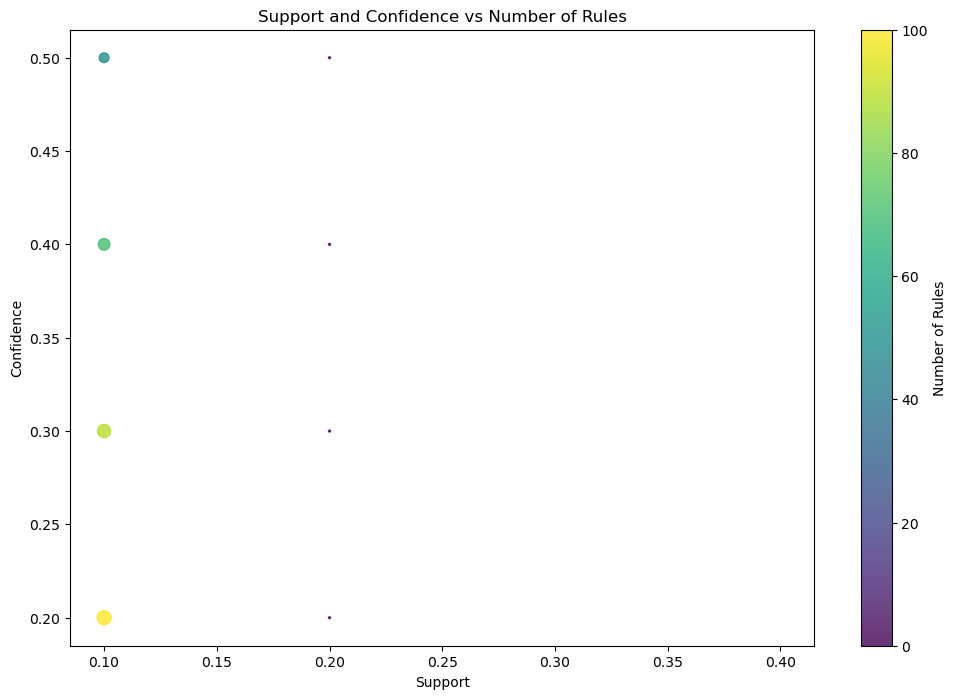

In [15]:
# Visualize the results
support_values, confidence_values = zip(*support_conf_data)
plt.figure(figsize=(12, 8))
plt.scatter(support_values, confidence_values, s=num_rules_data, c=num_rules_data, cmap='viridis', alpha=0.8)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support and Confidence vs Number of Rules')
plt.colorbar(label='Number of Rules')
plt.show()